Skript to Visualize and Replicate Axtell 99

In [762]:
import matplotlib.pyplot as plt
import dask.dataframe as dd
import pandas as pd
import scipy.signal
import numpy as np

In [763]:
out_dir = "../results/axtell_99"

In [764]:
opttype = 1

In [1379]:
run = 999

In [1380]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [1381]:
path_f = f"{out_dir}/res_firm_agent_run{run}_opttype{opttype}.csv.gz"

In [1382]:
path_w = f"{out_dir}/res_worker_agent_run{run}_opttype{opttype}.csv.gz"

In [1383]:
path_m = f"{out_dir}/res_model_agent_run{run}_opttype{opttype}.csv.gz"

In [1384]:
model_dk = dd.read_csv(path_m, blocksize=None)

In [1385]:
worker_dk = dd.read_csv(path_w, blocksize=None)

In [1386]:
stats = worker_dk[worker_dk["t"]== 0].compute()

In [1387]:
stats

,t,id,effort,wealth,income,job_event,tenure,preference
0,0,1,0.741913,1.292348,1.292348,stay,1,0.792383
1,0,3,0.898929,1.707004,1.707004,None,1,0.857884
2,0,5,0.739738,1.286950,1.286950,None,1,0.666032
3,0,7,0.545679,0.421722,0.421722,None,1,0.470254
4,0,9,0.000000,0.421722,0.421722,stay,1,0.102449
...,...,...,...,...,...,...,...,...
995,0,1991,0.772301,1.368750,1.368750,None,1,0.702588
996,0,1993,0.928234,1.789851,1.789851,stay,1,0.940850
997,0,1995,0.773111,1.370812,1.370812,None,1,0.703514
998,0,1997,0.977985,1.934439,1.934439,None,1,0.967454


In [1388]:
worker_df = worker_dk.groupby("t").mean().compute()

In [1389]:
worker_df

,id,effort,wealth,income,tenure,preference
t,,,,,,
0,1000.0,0.435652,0.747900,0.747900,1.000,0.49695
1,1000.0,0.398698,1.539950,0.792050,1.510,0.49695
2,1000.0,0.375605,2.319786,0.779836,1.813,0.49695
3,1000.0,0.364436,3.076487,0.756701,1.949,0.49695
4,1000.0,0.361572,3.851082,0.774595,2.039,0.49695
...,...,...,...,...,...,...
995,1000.0,0.346607,769.051630,0.784469,2.275,0.49695
996,1000.0,0.348095,769.805749,0.754120,2.228,0.49695
997,1000.0,0.351392,770.554686,0.748937,2.228,0.49695


In [1390]:
firm_dk = dd.read_csv(path_f, blocksize=None , dtype={
    "t": "int16",
    "id": "int32",
    "age": "int16",
    "number_employees": "int32",
    "total_effort": "float64",
    "output": "float64",
    "average_pref": "float64"}
)

In [1391]:
df = model_dk.compute()

In [1392]:
average_number_of_firms = df["total_firms"].mean()

In [1393]:
average_number_of_firms

534.022

In [1394]:
firm_number = firm_dk.groupby(firm_dk.t).t.size().mean()

In [1395]:
workers_check = firm_dk.groupby("t").number_employees.sum().compute()

In [1396]:
workers_check

t
0      1000
1      1000
2      1000
3      1000
4      1000
       ... 
995    1000
996    1000
997    1000
998    1000
999    1000
Name: number_employees, Length: 1000, dtype: int32

In [1397]:
firm_number.compute()

534.022

In [1398]:
width = 390

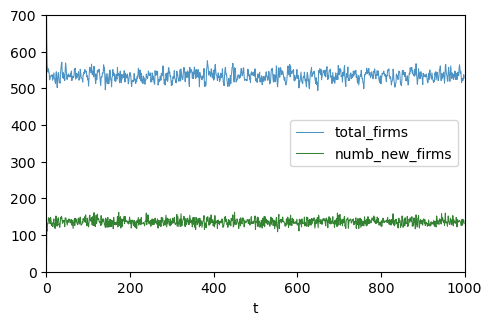

In [1399]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,700])
ax.set_xlim([0,1000])
df.plot(kind="line", y = "total_firms", x="t", ax=ax, linewidth=0.75, alpha=0.8)
df.plot(kind="line", y = "numb_new_firms", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

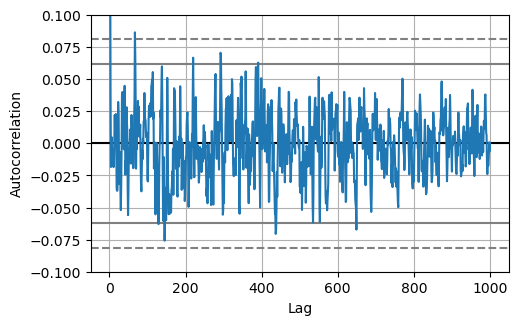

In [1400]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([-0.1,0.1])
pd.plotting.autocorrelation_plot(series=df.total_firms, ax = ax)
plt.show()

In [1401]:
average_firm = firm_dk.groupby(firm_dk.t).number_employees.mean().compute()

In [1402]:
average_firm

t
0      1.269036
1      1.592357
2      1.776199
3      1.811594
4      1.838235
         ...   
995    1.912046
996    1.919386
997    1.904762
998    1.862197
999    1.893939
Name: number_employees, Length: 1000, dtype: float64

In [1403]:
max_firm = firm_dk.groupby(firm_dk.t).number_employees.max().compute()

In [1404]:
max_firm

t
0       4
1       5
2       6
3       6
4       8
       ..
995    24
996    21
997    17
998    13
999    11
Name: number_employees, Length: 1000, dtype: int32

In [1405]:
print(max_firm.mean())

16.646


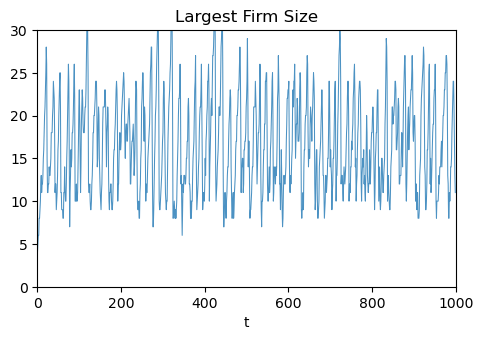

In [1406]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,30])
ax.set_xlim([0,1000])
ax.set_title("Largest Firm Size")
max_firm.plot(kind="line", y = "Largest Firm Size", x="t", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

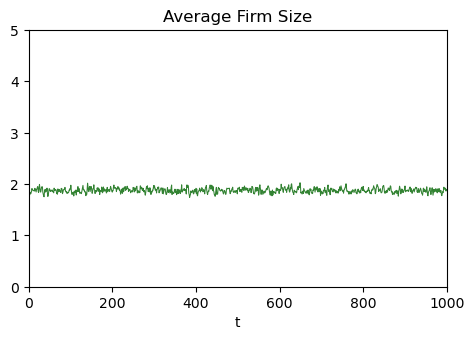

In [1407]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,5])
ax.set_xlim([0,1000])
ax.set_title("Average Firm Size")
average_firm.plot(kind="line", y = "Average Firm Size", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

Effort Levels

Average effort level (from worker df)

In [1408]:
worker_dk = dd.read_csv(path_w, blocksize=None)

In [1409]:
avg_effort = worker_dk.groupby(worker_dk.t).effort.mean().compute()

In [1410]:
avg_effort

t
0      0.435652
1      0.398698
2      0.375605
3      0.364436
4      0.361572
         ...   
995    0.346607
996    0.348095
997    0.351392
998    0.355861
999    0.356393
Name: effort, Length: 1000, dtype: float64

In [1411]:
firm_dk.assign(avg_e = firm_dk.total_effort/firm_dk.number_employees).groupby(firm_dk.t).number_employees.idxmax()

Dask Series Structure:
npartitions=1
    int64
      ...
Name: number_employees, dtype: int64
Dask Name: series-groupby-idxmax-agg, 8 tasks

In [1412]:
filtered_firm_dk = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]].assign(avg_e = firm_dk.total_effort/firm_dk.number_employees)

C:\Users\41782\AppData\Local\Temp\ipykernel_11168\188437644.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .transform(func)
  After:  .transform(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .transform(func, meta=('x', 'f8'))            for series result
  filtered_firm_dk = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]].assign(avg_e = firm_dk.total_effort/firm_dk.number_employees)


In [1216]:
avg_effort_maxfirm = filtered_firm_dk.groupby("t").avg_e.mean().compute()

In [1217]:
avg_effort_maxfirm

t
0      0.183375
1      0.567871
2      0.463712
3      0.257414
4      0.241303
         ...   
995    0.232049
996    0.209575
997    0.179808
998    0.102344
999    0.054987
Name: avg_e, Length: 1000, dtype: float64

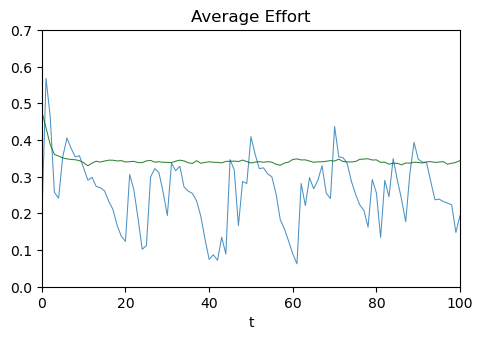

In [1218]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,0.7])
ax.set_xlim([0,100])
ax.set_title("Average Effort")
avg_effort_maxfirm.plot(kind="line", y = "avg_e", x="t", ax=ax, linewidth=0.75, alpha=0.8)
avg_effort.plot(kind="line", y = "effort", x="t", color="darkgreen", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

Output Total and Largest Firm

In [1219]:
filtered_firm_dk2 = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]]

C:\Users\41782\AppData\Local\Temp\ipykernel_11168\2543161246.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .transform(func)
  After:  .transform(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .transform(func, meta=('x', 'f8'))            for series result
  filtered_firm_dk2 = firm_dk[firm_dk.groupby(["t"]).number_employees.transform(max) == firm_dk["number_employees"]]


In [1220]:
output_max_firm = filtered_firm_dk2.groupby("t").output.max().compute()

In [1221]:
output_max_firm

t
0       1.757535
1      19.776489
2      37.543961
3      12.630663
4      12.977330
         ...    
995    48.713027
996    48.705605
997    38.860803
998    14.000692
999     3.264370
Name: output, Length: 1000, dtype: float64

In [1222]:
output_total = firm_dk.groupby("t").output.sum().compute()

In [1223]:
output_total

t
0      812.112945
1      959.964995
2      947.149760
3      874.195968
4      856.959638
          ...    
995    864.379523
996    856.004312
997    829.349637
998    802.095876
999    813.601180
Name: output, Length: 1000, dtype: float64

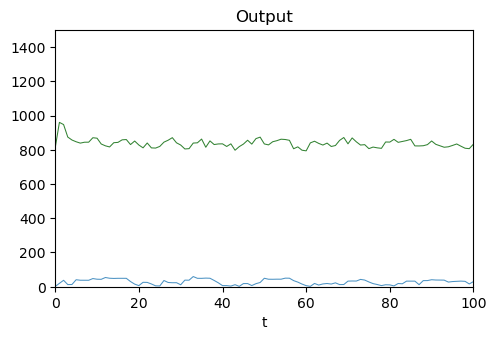

In [1224]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,1500])
ax.set_xlim([0,100])
ax.set_title("Output")
output_total.plot(kind="line", y = "output", x="t", ax=ax, linewidth=0.75, alpha=0.8, color="darkgreen")
output_max_firm.plot(kind="line", y = "output", x="t", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()

Distribution of Firm Sizes
The distribution of firm sizes across industries has a very characteristic
shape, that of a power law (also commonly known as a scaling law or Pareto
distribution). Data on firm sizes, measured variously, have proven to have
broadly robust power law behavior over many decades and across national
borders, this despite waves of mergers and acquisitions. Power law
distributions of firm sizes are also characteristic of the non-equilibrium
model described above. This is studied in the next section. Following that,
the distribution of firm growth rates yielded by the model is compared with
data. Then, the distribution of firm lifetimes the model produces is studied.
These also follow a power law.
Axtell 99 S.39

Maximum firm age (for sampling period)

In [1225]:
max_age = firm_dk["age"].max().compute()

In [1226]:
max_age

39

In [1227]:
firm_size = firm_dk[["t", "number_employees"]].compute()

In [1228]:
dist=firm_size.groupby(["t", "number_employees"]).size()

In [1229]:
firm_size2 = firm_size[firm_size.t >= 1]

In [1230]:
firm_size2

,t,number_employees
843,1,2
844,1,1
845,1,2
846,1,1
847,1,2
...,...,...
425882,999,1
425883,999,1
425884,999,1
425885,999,1


In [1231]:
dist2 = firm_size2.groupby(["number_employees"]).number_employees.size()

In [1232]:
dist2.values.sum()

425044

In [1233]:
dist2

number_employees
1     198950
2      87401
3      57316
4      34124
5      19251
6      10835
7       6504
8       3871
9       2339
10      1372
11       820
12       625
13       339
14       246
15       222
16       154
17       125
18       107
19        79
20        61
21        57
22        43
23        41
24        44
25        30
26        34
27        17
28        14
29         6
30         6
31         4
32         3
33         2
34         2
Name: number_employees, dtype: int64

In [1234]:
type(dist2)

pandas.core.series.Series

In [1235]:
print(dist2.sum())

425044


In [1236]:
y_frequency_all = dist2.values/dist2.sum()

In [1237]:
y_frequency_all = y_frequency_all.tolist()

In [1238]:
y_frequency_all

[0.46806918813111115,
 0.20562812320606808,
 0.13484721581765652,
 0.08028345300721808,
 0.04529178155673295,
 0.025491478529281675,
 0.01530194521037822,
 0.009107292421490481,
 0.0055029596935846645,
 0.003227901111414348,
 0.0019292120345187791,
 0.0014704360019198012,
 0.0007975644874413002,
 0.0005787636103556338,
 0.0005222988678819134,
 0.000362315430873039,
 0.00029408720038396024,
 0.00025173864352866996,
 0.00018586311064266287,
 0.0001435145537873726,
 0.00013410376337508588,
 0.00010116599693208232,
 9.646060172593897e-05,
 0.000103518694535154,
 7.058092809215046e-05,
 7.999171850443718e-05,
 3.999585925221859e-05,
 3.2937766443003546e-05,
 1.4116185618430093e-05,
 1.4116185618430093e-05,
 9.410790412286728e-06,
 7.058092809215046e-06,
 4.705395206143364e-06,
 4.705395206143364e-06]

In [1239]:
x_employees_all = dist2.index.values.tolist()

In [1240]:
x_employees_all

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34]

In [1241]:
d = {"Employees": x_employees_all, "Count": y_frequency_all}

In [1242]:
df = pd.DataFrame(d)

 powerlaw not good for extreme cases, low and high prune

In [1243]:
df_big = df[df.Count > 10**(-5)]

In [1244]:
df_big = df_big[1:]

weibull not needed to prune

In [1245]:
# df_big = df

In [1246]:
df_big

,Employees,Count
1,2,0.205628
2,3,0.134847
3,4,0.080283
4,5,0.045292
5,6,0.025491
6,7,0.015302
7,8,0.009107
8,9,0.005503
9,10,0.003228
10,11,0.001929


In [1247]:
x_new = df_big.Employees
y_new = df_big.Count

function to sample firm size (employee) distribution for different t's

In [1248]:
def sample_dist(dist, start, max_age, numb_samples):
    df_list = []
    for x in range(numb_samples):
        i = start + x * max_age
        sample = dist.loc[i, :]
        freq = sample / sample.sum()
        freq_df = freq.reset_index(inplace=False)
        freq_df = freq_df.rename(columns={0: f"Frequency{x}"})
        df_list.append(freq_df)
    return df_list

In [1249]:
dfs = sample_dist(dist, 1, 10, 10)

In [1250]:
from functools import reduce

In [1251]:
df3 = reduce(lambda left,right: pd.merge(left,right,on=["number_employees"], how="outer"), dfs)

In [1252]:
df3

,number_employees,Frequency0,Frequency1,Frequency2,Frequency3,Frequency4,Frequency5,Frequency6,Frequency7,Frequency8,Frequency9
0,1,0.549320,0.4625,0.482679,0.454118,0.470588,0.471264,0.424594,0.476636,0.459135,0.465517
1,2,0.270408,0.1900,0.207852,0.232941,0.202353,0.227586,0.238979,0.191589,0.192308,0.179803
2,3,0.130952,0.1425,0.127021,0.124706,0.141176,0.119540,0.148492,0.130841,0.144231,0.140394
3,4,0.032313,0.0725,0.078522,0.084706,0.084706,0.075862,0.099768,0.088785,0.096154,0.086207
4,5,0.015306,0.0525,0.036952,0.042353,0.040000,0.043678,0.025522,0.051402,0.038462,0.056650
5,7,0.001701,0.0250,0.011547,0.011765,0.014118,0.016092,0.013921,0.007009,0.016827,0.022167
6,6,NaN,0.0200,0.030023,0.016471,0.014118,0.020690,0.034803,0.025701,0.019231,0.009852
7,8,NaN,0.0125,0.009238,0.014118,0.018824,0.006897,0.004640,0.009346,0.014423,0.017241
8,9,NaN,0.0100,0.002309,0.002353,0.004706,0.009195,0.006961,0.009346,0.004808,0.012315
9,11,NaN,0.0025,0.004619,NaN,NaN,NaN,NaN,NaN,0.002404,0.004926


In [1253]:
df3['avg'] = df3.iloc[:,1:].mean(axis=1)

In [1254]:
# df3['size'] = df3.iloc[:,1:].size(axis=1)

In [1255]:
df3 = df3.iloc[1:20,:]

In [1256]:
dfplot = df3[["number_employees", "avg"]]

In [1257]:
x_employees = df3["number_employees"].values.tolist()

In [1258]:
y_frequency = df3["avg"].values.tolist()

In [1259]:
y_frequency

[0.213381923315321,
 0.13498536077444095,
 0.07995224696683356,
 0.04028244213889015,
 0.014014720159226812,
 0.021209743326274216,
 0.011914025037672585,
 0.006888112125684119,
 0.0036122230431430476,
 0.004048639140100581,
 0.0025,
 0.00268805732338664,
 0.0023547993322395573,
 0.0023094688221709007,
 0.005189598422973146,
 0.0023587578883061343,
 0.002352941176470588]

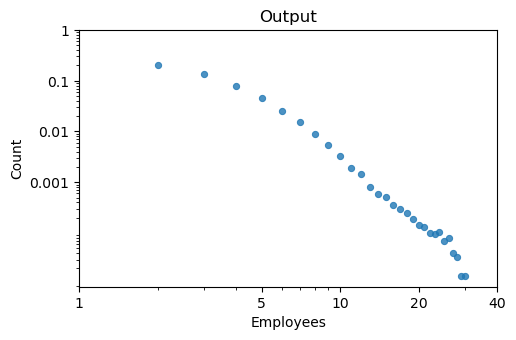

In [1260]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
#ax.set_ylim([0,0.4])
#ax.set_xlim([0,100])
ax.set_title("Output")
ticks = (1,5,10,20, 40)
ticksy = (0.001, 0.01, 0.1, 1)
df_big.plot("Employees","Count",kind="scatter", ax=ax, linewidth=0.75, alpha=0.8, loglog=True)
ax.set_xticks(ticks=ticks)
ax.set_xticklabels(labels=ticks)
ax.set_yticks(ticks=ticksy)
ax.set_yticklabels(labels=ticksy)
plt.show()

Fit the firmsize power-law data

In [1261]:
# Function to calculate the power-law with constants a and b
def power_law(x, b):
    return np.power(x, -(1+b), dtype=float)

In [1262]:
def weibull(x, a, b):
    return 1-np.exp(-a*x**b, dtype=float)

def gld(x, a, b):
    return 1-(1+a*x/b)**((-1)/a)

In [1263]:
from scipy.optimize import curve_fit

In [1264]:
pars, cov = curve_fit(f=power_law, xdata= x_new, ydata=y_new, p0=0, bounds=(-np.inf, np.inf))

In [1265]:
pars2, cov2 = curve_fit(f=weibull, xdata= x_new, ydata=y_new, p0=[0,0], bounds=(-np.inf, np.inf))

In [1266]:
# not found optima
# pars3, cov3 = curve_fit(f=gld, xdata= x_new, ydata=y_new, p0=[0,0], bounds=(-np.inf, np.inf))

Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)

In [1267]:
stdevs = np.sqrt(np.diag(cov))

In [1268]:
stdevs2 = np.sqrt(np.diag(cov2))

Calculate the residuals

In [1269]:
res = y_new - power_law(x_new, *pars)

In [1270]:
ss_res = np.sum(res**2)

In [1271]:
ss_res

0.0029343239972103043

In [1272]:
ss_tot = np.sum((y_new-np.mean(y_new))**2)

In [1273]:
ss_tot

0.06022265096873764

In [1274]:
res2 = y_new - weibull(x_new, *pars2)

In [1275]:
ss_res2 = np.sum(res2**2)

In [1276]:
ss_tot2 = np.sum((y_new-np.mean(y_new))**2)

In [1277]:
r_squared = 1-(ss_res/ss_tot)

In [1278]:
r_squared

0.9512754096671442

In [1279]:
r_squared2 = 1-(ss_res2/ss_tot2)

In [1280]:
r_squared2

0.9709500925100119

In [1281]:
pars

array([1.07291751])

In [1282]:
pars2

array([ 0.90206001, -1.87019998])

In [1042]:
test = dist.loc[500, :]

In [1043]:
test

number_employees
1     247
2     119
3      60
4      32
5      22
6       8
7       2
8       1
10      1
17      1
dtype: int64

In [915]:
frequency = test/test.sum()

In [916]:
freq_df = frequency.reset_index(inplace=False)

In [917]:
freq_df = freq_df.rename(columns={0:"Frequency"})

In [918]:
freq_df

,number_employees,Frequency
0,1,0.547206
1,2,0.238921
2,3,0.105973
3,4,0.057803
4,5,0.023121
5,6,0.007707
6,7,0.005780
7,8,0.005780
8,9,0.001927
9,11,0.001927


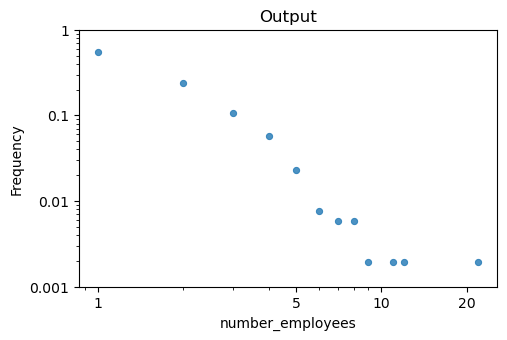

In [919]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
#ax.set_ylim([0,0.4])
#ax.set_xlim([0,100])
ax.set_title("Output")
ticks = (1,5,10,20)
ticksy = (0.001, 0.01, 0.1, 1)
freq_df.plot("number_employees","Frequency",kind="scatter", ax=ax, linewidth=0.75, alpha=0.8, loglog=True)
ax.set_xticks(ticks=ticks)
ax.set_xticklabels(labels=ticks)
ax.set_yticks(ticks=ticksy)
ax.set_yticklabels(labels=ticksy)
plt.show()

Overall Behavior of Agents, I (Population Cross-Section)

In [920]:
effort_dist = worker_dk[["t", "effort"]].compute()
dist_e = effort_dist.groupby(["t", "effort"]).size()

In [921]:
dist_e

t    effort  
0    0.000000    161
     0.000302      1
     0.001578      1
     0.003230      1
     0.005677      1
                ... 
999  0.998096      1
     0.998708      1
     0.998777      1
     0.999090      1
     0.999196      1
Length: 615929, dtype: int64

In [922]:
dfs_e = sample_dist(dist_e, 300, 30, 200)

df_e = reduce(lambda left, right: pd.merge(left, right, on=["effort"], how="outer"), dfs_e)
df_e['avg'] = df_e.iloc[:, 1:].mean(axis=1)
df_e = df_e.iloc[1:, :]
dfplot_e = df_e[["effort", "avg"]]
x_effort = df_e["effort"].values.tolist()
y_frequency_e = df3["avg"].values.tolist()

KeyError: 1020

In [923]:
y_frequency_e

NameError: name 'y_frequency_e' is not defined

NameError: name 'dfplot_e' is not defined

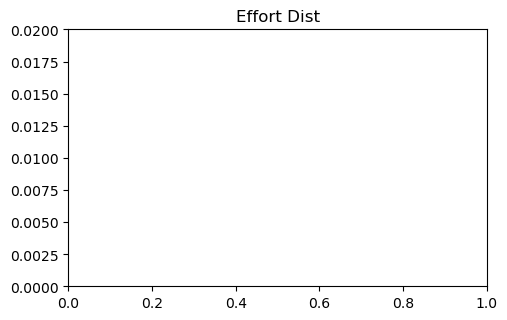

In [924]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.set_ylim([0,0.02])
ax.set_xlim([0,1])
ax.set_title("Effort Dist")
dfplot_e.plot("effort","avg",kind="scatter", ax=ax, linewidth=0.75, alpha=0.8)
plt.show()